Contenido bajo licencia Creative Commons BY 4.0 y código bajo licencia MIT. © Juan Gómez y Nicolas Guarín-Zapata 2019. Este material es parte del curso Mecánica de los Medios Continuos en el programa de Ingeniería Civil de la Universidad EAFIT.

# Diseño de una presa trapezoidal de concreto.

### Verificación 2-Carga uniforme

<center><img src="img/dam_uniform.png" alt="files" style="width:500px"></center>

$$M=\frac{\gamma H^3}2+\frac{\gamma H}2x^2-\gamma H^2x$$

$$\sigma=\frac{12}{A_c^3}y\left(\frac{\gamma H^3}2+\frac{\gamma H}2x^2-\gamma H^2x\right)$$

En la base (empotramiento) para $y=A_c/2$ se tiene:

$$\sigma=32666666.0\;N/m^2/m$$

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import meshio
import solidspy.preprocesor as msh
import solidspy.assemutil as ass
import solidspy.postprocesor as pos
import solidspy.solutil as sol
import aux_functions as aux

In [2]:
mesh = meshio.read("files/dam_param.msh")
points = mesh.points
cells  = mesh.cells
cell_data  = mesh.cell_data
aux.script_mesh(mesh)

In [3]:
#
#Parametros de diseno que afectan la carga.
#
H_p   = 100.0
A_c   = 30.0
gamma = 9.8e3
#gamma = 0.0
#
# Aplique carga de empuje sobre la presa (usando gamma =  9.8e3 kN/m^3).
#
cargas  = aux.uniform_loading(cells, cell_data, 3000, points, gamma , H_p)
np.savetxt("files/Dloads.txt", cargas, fmt=("%d", "%.3g", "%.3g"))

## Análisis de tensiones

A continuación se ejectua el análisis por elementos finitos.

In [4]:
nodes, mats, elements, loads = aux.readin()
DME, IBC, neq = ass.DME(nodes, elements)
mat_rigidez = ass.assembler(elements, mats, nodes, neq, DME)
force_vec = ass.loadasem(loads, IBC, neq) + \
    aux.body_forces(elements, nodes, neq, DME, force_y=aux.force_y)

In [5]:
UG = sol.static_sol(mat_rigidez, force_vec)
UC = pos.complete_disp(IBC, nodes, UG)

## Pos-procesamiento


<IPython.core.display.Javascript object>


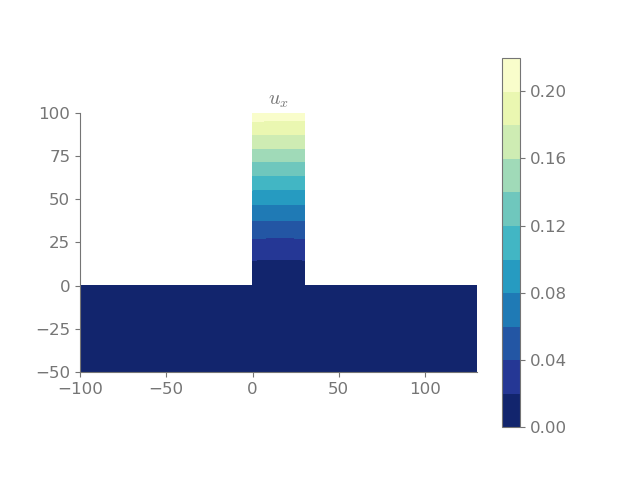

/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'shading'
  s)


<IPython.core.display.Javascript object>


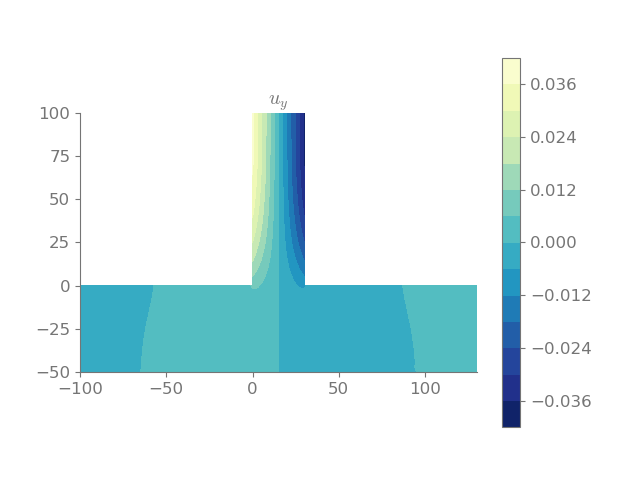

<IPython.core.display.Javascript object>


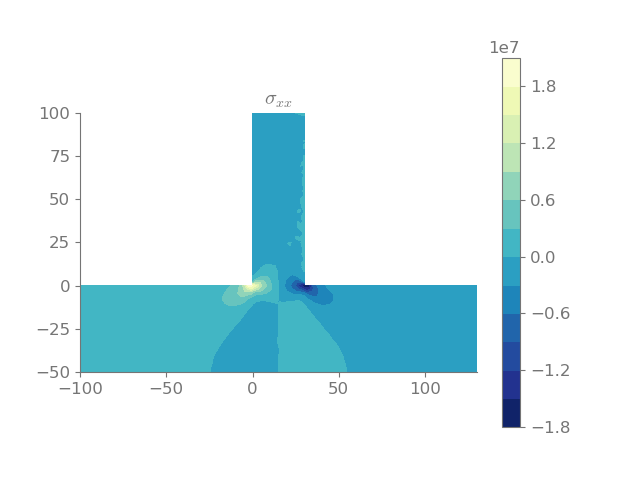

<IPython.core.display.Javascript object>


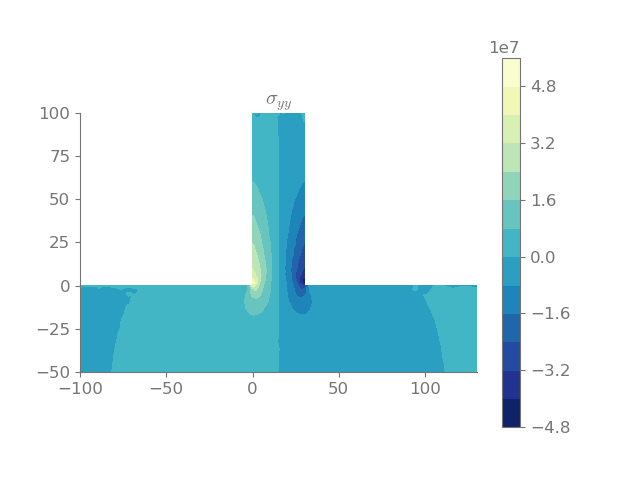

<IPython.core.display.Javascript object>


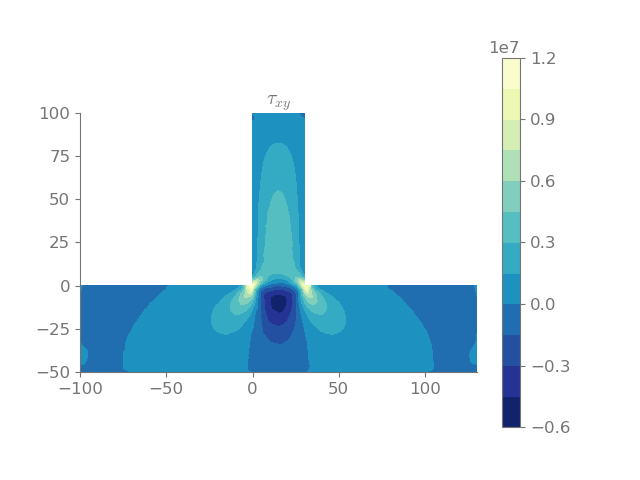

In [6]:
E_nodes, S_nodes = pos.strain_nodes(nodes, elements, mats, UC)
pos.fields_plot(elements, nodes, UC, S_nodes=S_nodes)

**Mapa de lineas del modelo de gmsh**
<center><img src="img/dam_map.png" alt="files" style="width:500px"></center>

## Algunas unidades y equivalencias útiles

* $1 \quad \text{ N} = 1\quad \text{ kg m/s}^2$.

* $1\quad \text{ Pa} = 1 \text{ N/m}^2$.

* $1\quad \text{ kPa} = 1 \times 10^3 \text{ Pa}$.

* $1\quad \text{ MPa} = 1 \times 10^6 \text{ Pa}$.

* $1\quad \text{ GPa} = 1 \times 10^9 \text{ Pa}$.

### Referencias

* Juan Gómez, Nicolás Guarín-Zapata (2018). SolidsPy: 2D-Finite Element Analysis with Python, <https://github.com/AppliedMechanics-EAFIT/SolidsPy>.

In [7]:
from IPython.core.display import HTML
def css_styling():
    styles = open('./nb_style.css', 'r').read()
    return HTML(styles)
css_styling()